Student Performance Indicator

# Problem Statement
This project understands and predicts the student's performance based on the variables like Gender, Ethnicity, Parental level of Education, Lunch and Test preparation course


# Importing Data and required packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Importing csv file as Pandas dataframe

In [2]:
df = pd.read_csv('dataspi.csv')

# Exploratory Data Analysis

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.shape

(1000, 8)

In [5]:
# Check for Missing values
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [6]:
# check for duplicates
df.duplicated().sum()

0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [8]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [9]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [10]:
#Define numerical and categorical features
num_features = [feature for feature in df.columns if df[feature].dtype != 'O']
cat_features = [feature for feature in df.columns if df[feature].dtype == 'O']

print('There are {} numerical features: {}'.format(len(num_features), num_features))
print('There are {} categorical features: {}'.format(len(cat_features), cat_features))

There are 3 numerical features: ['math score', 'reading score', 'writing score']
There are 5 categorical features: ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [11]:
#Creating columns for total score and average
df['total_score'] = df['math score'] + df['reading score'] + df['writing score']
df['average'] = df['total_score']/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [12]:
reading_score_full = df[df['reading score'] == 100]['average'].count()
writing_score_full = df[df['writing score'] == 100]['average'].count()
math_score_full = df[df['math score'] == 100]['average'].count()

print(f'students with full marks in reading: {reading_score_full}')
print(f'students with full marks in writing: {writing_score_full}')
print(f'students with full marks in math: {math_score_full}')

students with full marks in reading: 17
students with full marks in writing: 14
students with full marks in math: 7


In [13]:
reading_low = df[df['reading score'] < 20]['average'].count()
writing_low = df[df['writing score'] < 20]['average'].count()
math_low = df[df['math score'] < 20]['average'].count()

print(f'students with low marks in reading: {reading_low}')
print(f'students with low marks in writing: {writing_low}')
print(f'students with low marks in math: {math_low}')

students with low marks in reading: 1
students with low marks in writing: 3
students with low marks in math: 4


# Insights
1. Students performance is good in reading
2. Math performance of students is not good

# Data Visualization

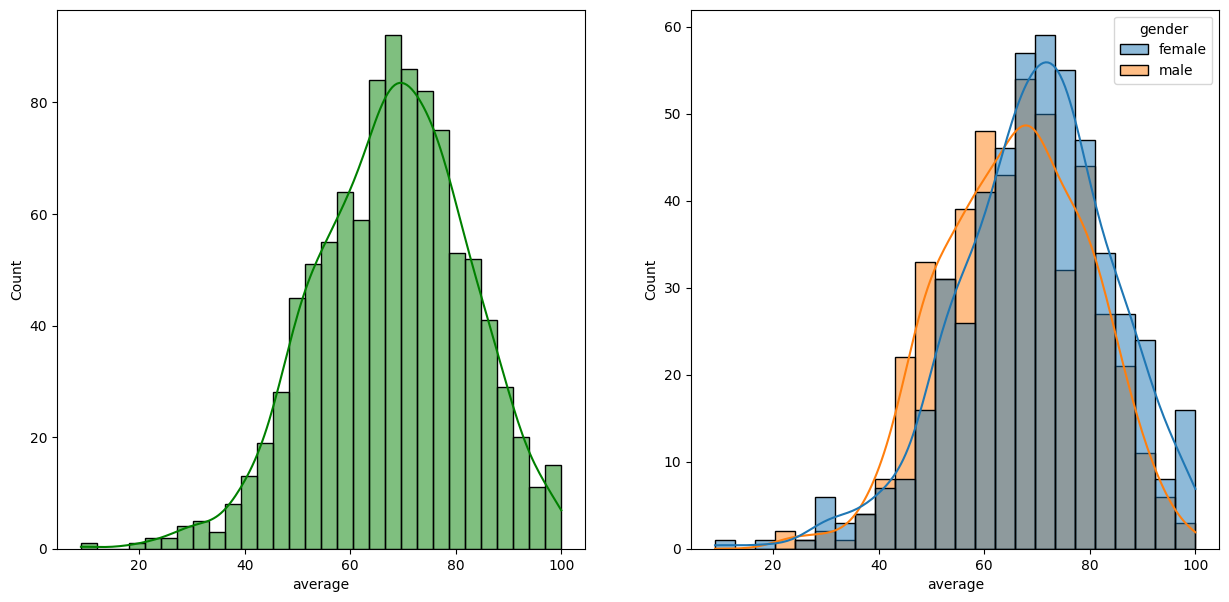

In [14]:
fig, axs = plt.subplots(1, 2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df, x='average', bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='average', kde=True, hue='gender')
plt.show()

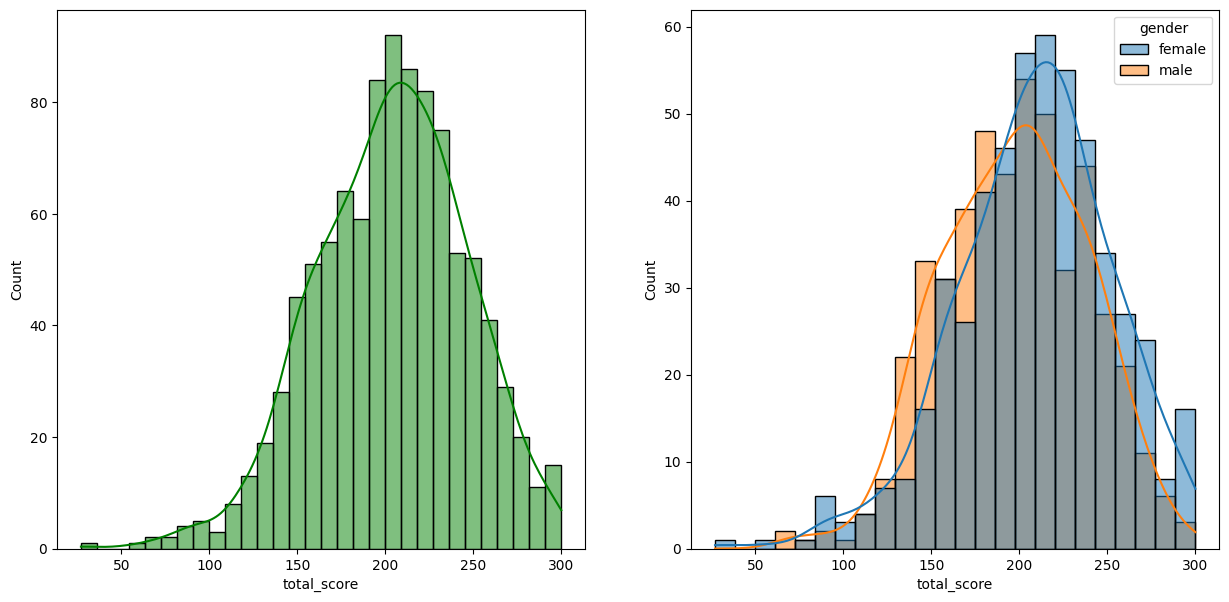

In [15]:
fig, axs = plt.subplots(1, 2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df, x='total_score', bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='total_score', kde=True, hue='gender')
plt.show()

# Insights
1. Female students performed well than the Male students
2. Standard lunch helped both Male and Female students to perform well
3. Students who completed the test prep course has done well in the exams
4. race/ethnicity and parental level of education does not have any impact on the performance of students

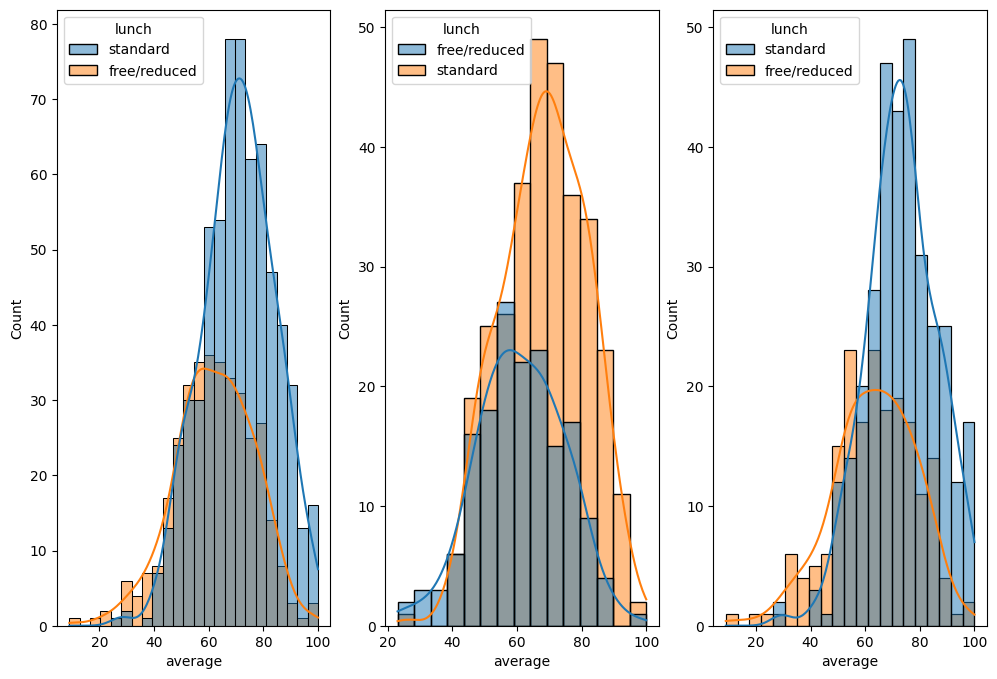

In [16]:
fig, axs = plt.subplots(1, 3, figsize=(12,8))
plt.subplot(131)
sns.histplot(data=df, x='average', kde=True, hue='lunch')
plt.subplot(132)
sns.histplot(data=df[df['gender'] == 'male'], x='average', kde=True, hue='lunch')
plt.subplot(133)
sns.histplot(data=df[df['gender'] == 'female'], x='average', kde=True, hue='lunch')
plt.show()

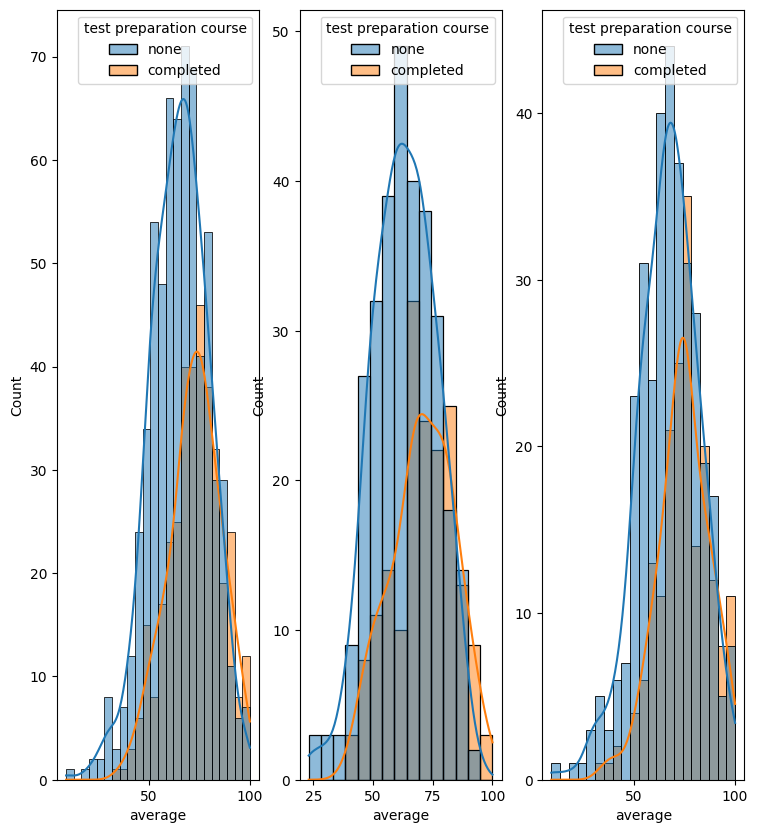

In [22]:
fig, axs = plt.subplots(1, 3, figsize=(12,10))
plt.subplot(141)
sns.histplot(data=df, x='average', kde=True, hue='test preparation course')
plt.subplot(142)
sns.histplot(data=df[df['gender'] == 'male'], x='average', kde=True, hue='test preparation course')
plt.subplot(143)
sns.histplot(data=df[df['gender'] == 'female'], x='average', kde=True, hue='test preparation course')
plt.show()

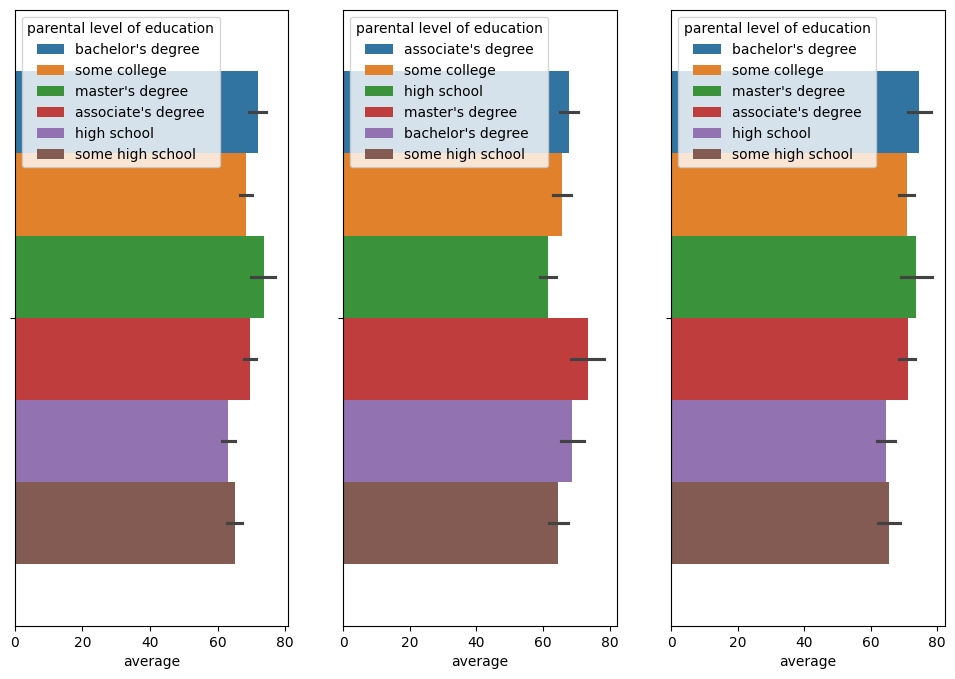

In [27]:
fig, axs = plt.subplots(1, 3, figsize=(12,8))
plt.subplot(131)
sns.barplot(data=df, x='average', hue='parental level of education')
plt.subplot(132)
sns.barplot(data=df[df['gender'] == 'male'], x='average', hue='parental level of education')
plt.subplot(133)
sns.barplot(data=df[df['gender'] == 'female'], x='average', hue='parental level of education')
plt.show()

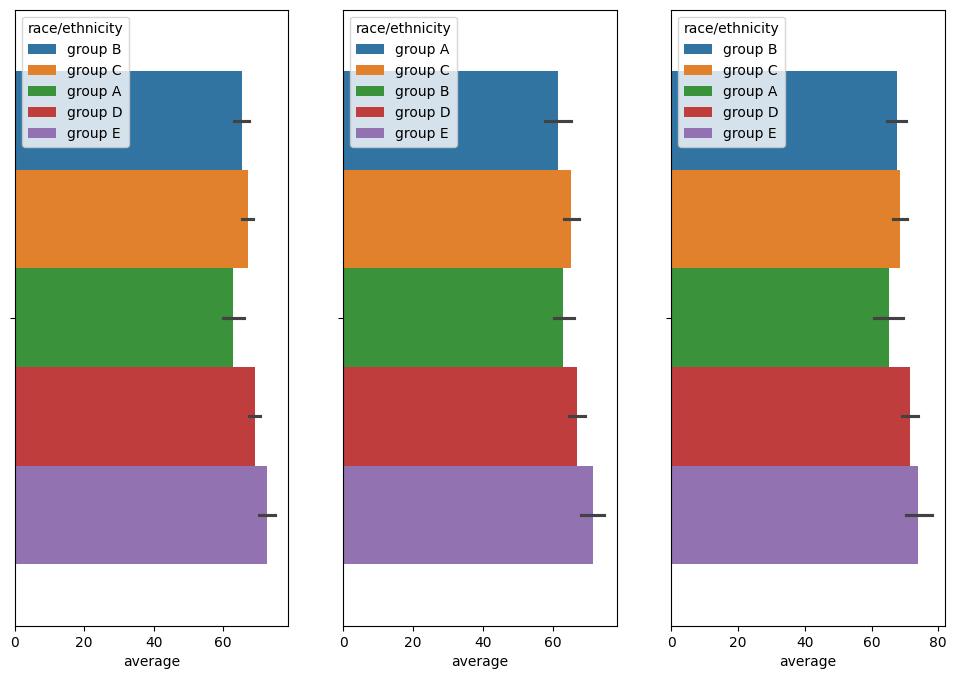

In [28]:
fig, axs = plt.subplots(1, 3, figsize=(12,8))
plt.subplot(131)
sns.barplot(data=df, x='average', hue='race/ethnicity')
plt.subplot(132)
sns.barplot(data=df[df['gender'] == 'male'], x='average', hue='race/ethnicity')
plt.subplot(133)
sns.barplot(data=df[df['gender'] == 'female'], x='average', hue='race/ethnicity')
plt.show()

# Insights
1. Female students performed well than the Male students
2. Standard lunch helped both Male and Female students to perform well
3. Students who completed the test prep course has done well in the exams
4. race/ethnicity and parental level of education does not have any impact on the performance of students

# Outlier check

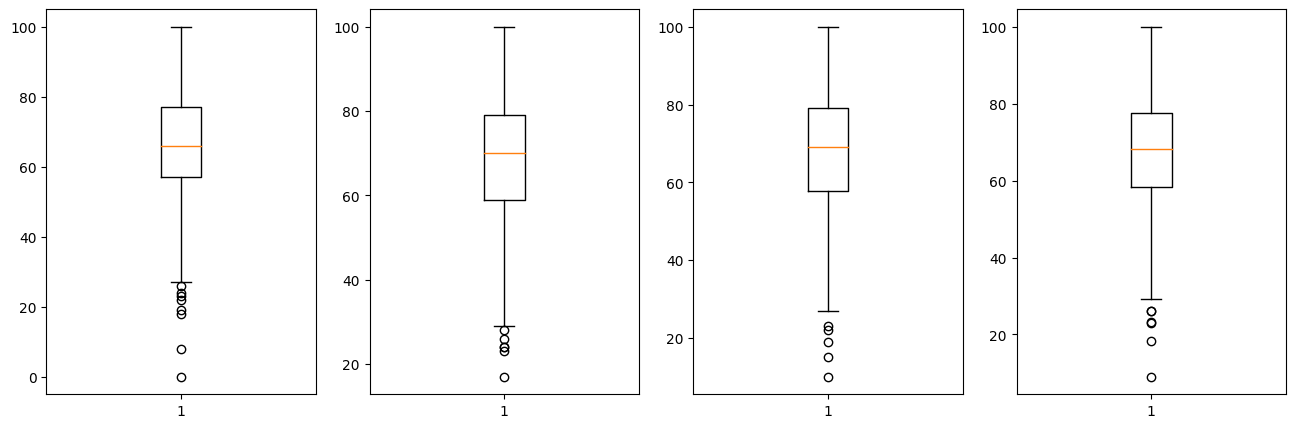

In [30]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
plt.boxplot(df['math score'])
plt.subplot(142)
plt.boxplot(df['reading score'])
plt.subplot(143)
plt.boxplot(df['writing score'])
plt.subplot(144)
plt.boxplot(df['average'])
plt.show()

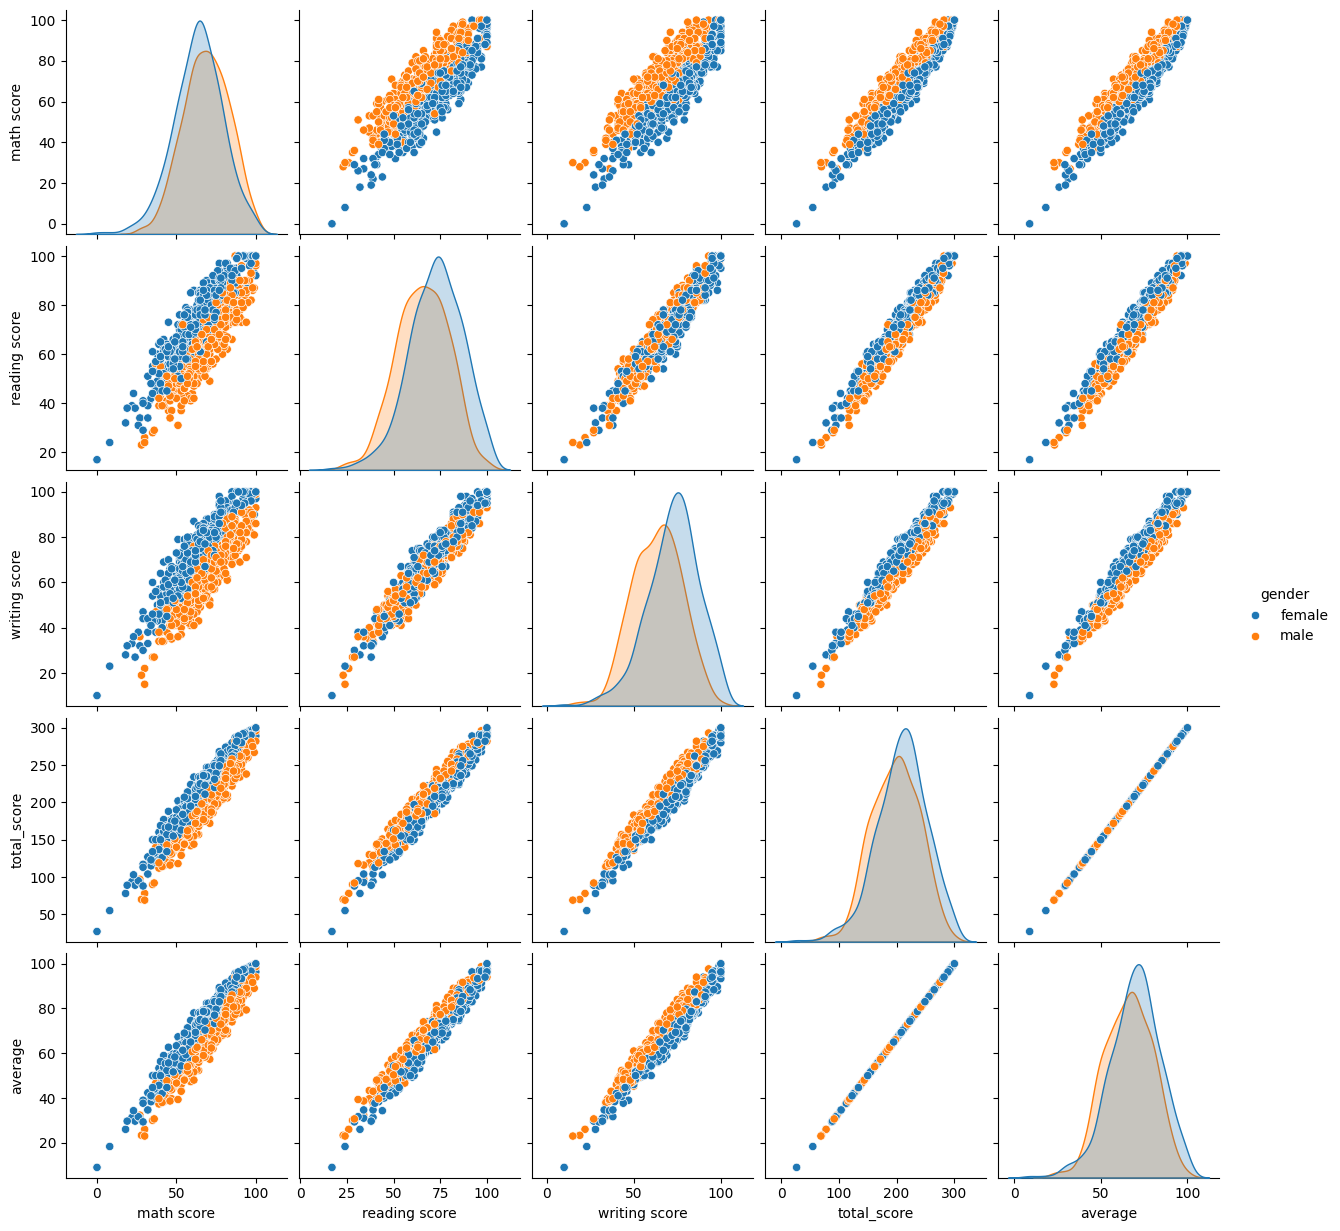

In [31]:
sns.pairplot(df, hue='gender')
plt.show()